# Group F

Groupmembers are:


|Gender|Firstname|Surname|Email| Study program| Semester| Student ID|
|:----:|:--------|:------|:----|:----------|:------------|:--------|
| f | Cam Van | Tran Thi | cam.tranthi@student.uni-siegen.de | HCI | 4 | 1542660 |
| f |.....|.....|.....| HCI |.....|.....|
| m |.....|.....|.....| HCI |.....|.....|

    
**Course**: First steps into Artificial Intelligence: Organization & Introduction

**Examiner**: Prof. Dr. Thomas Ludwig

**Semester**: Summersemester 2022

**Submission date**: 31. July 2022

**City**: Siegen, Germany


## Imports
Following imports and addtional installtions are needed:

In [1]:
# If there are additional libraries needed to run the following code install them here


In [5]:
# list all needed imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## TODO: Predict price 
...determine the cut based on the diamond characteristics (including price). Only if the price is approximately correct and the cut can be predicted correctly, the owner considers the price of the diamond to be fair and buys it.

### DATASET DESCRIPTION

**price** price in US dollars (\$ 326 --\$18,823)

**carat** weight of the diamond (0.2--5.01)

**cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color** diamond colour, from J (worst) to D (best)

**clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x** length in mm (0--10.74)

**y** width in mm (0--58.9)

**z** depth in mm (0--31.8)

**depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table** width of top of diamond relative to widest point (43--95)

In [6]:
# This is how the data needs to be inserted!

datapath = "data/diamonds_FSAI_SoSe22.csv"
raw_df = pd.read_csv(datapath, index_col = 0)
raw_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.83,Premium,F,VS2,60.2,60.0,3495,6.09,6.04,3.65
1,1.25,Premium,H,SI1,60.7,58.0,5027,7.04,6.99,4.26
2,0.41,Premium,D,SI1,60.5,60.0,791,4.77,4.81,2.90
3,0.31,Good,H,VS2,63.1,57.0,489,4.28,4.31,2.71
4,0.30,Ideal,G,IF,62.2,55.0,844,4.30,4.32,2.68
...,...,...,...,...,...,...,...,...,...,...
45844,0.44,Premium,G,SI1,61.1,59.0,990,4.90,4.86,2.98
45845,1.52,Good,J,VVS2,57.9,62.0,8861,7.61,7.63,4.41
45846,1.00,Good,F,VS2,61.1,61.0,6841,6.38,6.45,3.92
45847,0.32,Good,J,SI1,63.2,56.0,374,4.31,4.36,2.74


In [7]:
raw_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [8]:
raw_df.values

array([[0.83, 'Premium', 'F', ..., 6.09, 6.04, 3.65],
       [1.25, 'Premium', 'H', ..., 7.04, 6.99, 4.26],
       [0.41, 'Premium', 'D', ..., 4.77, 4.81, 2.9],
       ...,
       [1.0, 'Good', 'F', ..., 6.38, 6.45, 3.92],
       [0.32, 'Good', 'J', ..., 4.31, 4.36, 2.74],
       [0.41, 'Ideal', 'E', ..., 4.8, 4.75, 2.95]], dtype=object)

In [9]:
raw_df.shape

(45849, 10)

In [10]:
len(raw_df)

45849

In [11]:
# check the general information of the dataset
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45849 entries, 0 to 45848
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    45849 non-null  float64
 1   cut      45849 non-null  object 
 2   color    45849 non-null  object 
 3   clarity  45849 non-null  object 
 4   depth    45849 non-null  float64
 5   table    45849 non-null  float64
 6   price    45849 non-null  int64  
 7   x        45849 non-null  float64
 8   y        45849 non-null  float64
 9   z        45849 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


#### 'cut', 'color' and 'clarity' are categorical variables, the rest are numerical variables.

In [12]:
raw_df.describe()

,carat,depth,table,price,x,y,z
count,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000
mean,0.797251,61.749371,57.456823,3925.804772,5.729115,5.732836,3.537766
std,0.473729,1.436693,2.234886,3982.937163,1.122093,1.147394,0.707841
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,948.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2398.000000,5.700000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5327.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18818.000000,10.740000,58.900000,31.800000


#### x, y, z has some values =  0, which means some diamonds have insufficient information and might effect to accuracy of the prediction => should be removed

In [13]:
#Dropping values = 0

raw_df = raw_df.drop(raw_df[raw_df['x'] == 0].index)
raw_df = raw_df.drop(raw_df[raw_df['y'] == 0].index)
raw_df = raw_df.drop(raw_df[raw_df['z'] == 0].index)

In [14]:
raw_df.describe()

,carat,depth,table,price,x,y,z
count,45832.000000,45832.000000,45832.000000,45832.000000,45832.000000,45832.000000,45832.000000
mean,0.797046,61.749476,57.456469,3924.233898,5.729815,5.733403,3.539079
std,0.473601,1.436394,2.234326,3981.223364,1.119487,1.145173,0.704684
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,947.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2396.500000,5.695000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5325.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18818.000000,10.740000,58.900000,31.800000


In [15]:
raw_df.shape

(45832, 10)

#### 45849 - 45832 = 17 rows with 0 values were deleted

<AxesSubplot:ylabel='Frequency'>

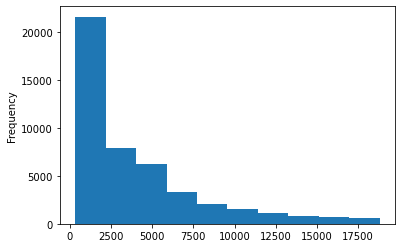

In [16]:
# plot price
raw_df.price.plot.hist()

In [17]:
raw_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#### the dataset has no null values => no need to process missing or unknown data

In [18]:
raw_df['cut'].value_counts()

Ideal        18347
Premium      11636
Very Good    10281
Good          4191
Fair          1377
Name: cut, dtype: int64

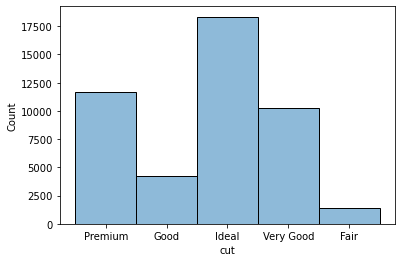

In [19]:
# histplot or displot: show the numbers of each type of clarity
sns.histplot(raw_df["cut"], bins=10, alpha=0.5)
plt.show()

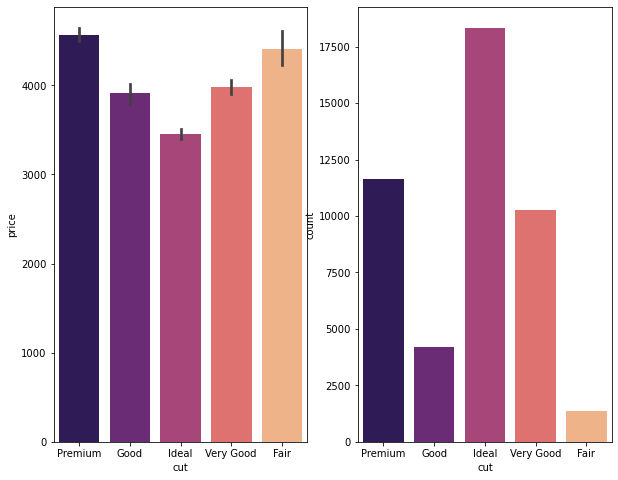

In [20]:
# # plot cut in relation to price
f, axes = plt.subplots(1, 2, figsize=(10, 8)) #sharey=True

#barplots: show the mean values of each type of cut
sns.barplot(x="cut",y="price",data=raw_df, ax=axes[0], palette="magma")

#countplots: count the numbers of each type of cut
sns.countplot(x="cut",data=raw_df, ax=axes[1], palette="magma")

plt.show()

In [21]:
raw_df['color'].value_counts()

G    9617
E    8339
F    8081
H    7088
D    5728
I    4589
J    2390
Name: color, dtype: int64

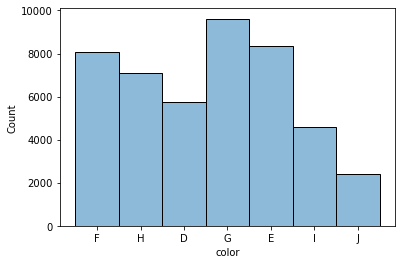

In [22]:
# histplot or displot: show the numbers of each type of clarity
sns.histplot(raw_df["color"], bins=10, alpha=0.5)
plt.show()

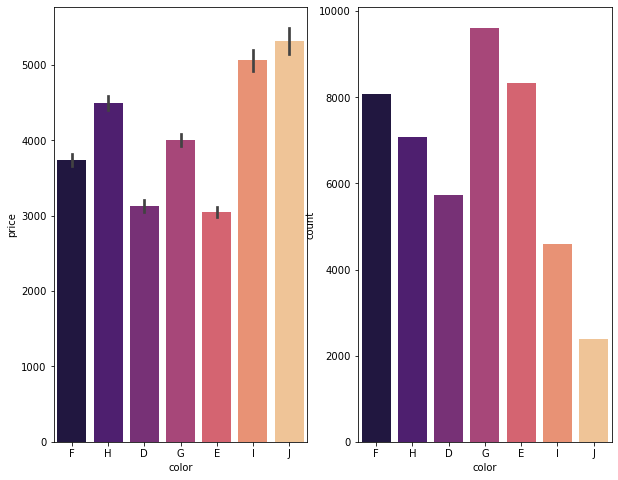

In [23]:
# plot color in relation to price
f, axes = plt.subplots(1, 2, figsize=(10, 8)) #sharey=True

#barplots
sns.barplot(x="color",y="price",data=raw_df, ax=axes[0], palette="magma")

#countplots
sns.countplot(x="color",data=raw_df, ax=axes[1], palette="magma")

plt.show()

In [24]:
raw_df['clarity'].value_counts()

SI1     11116
VS2     10458
SI2      7734
VS1      6920
VVS2     4314
VVS1     3109
IF       1535
I1        646
Name: clarity, dtype: int64

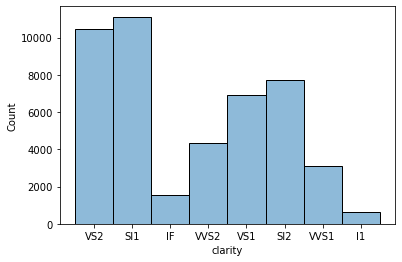

In [25]:
# histplot or displot: show the numbers of each type of clarity
sns.histplot(raw_df["clarity"], bins=10, alpha=0.5)
plt.show()

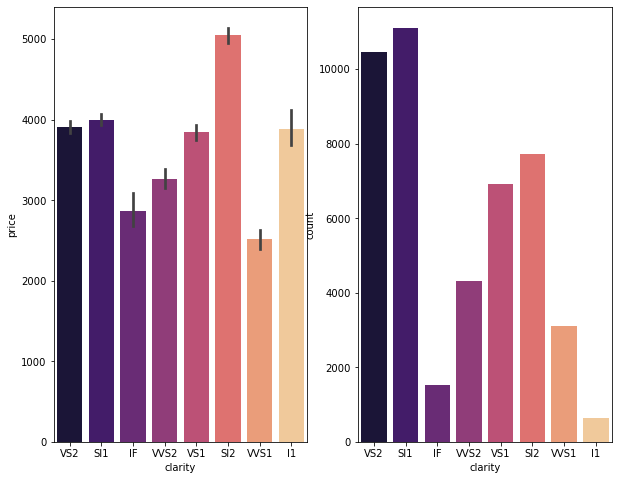

In [26]:
# plot clarity in relation to price
f, axes = plt.subplots(1, 2, figsize=(10, 8)) #sharey=True

#barplots
sns.barplot(x="clarity",y="price",data=raw_df, ax=axes[0], palette="magma")

#countplots
sns.countplot(x="clarity",data=raw_df, ax=axes[1], palette="magma")

plt.show()

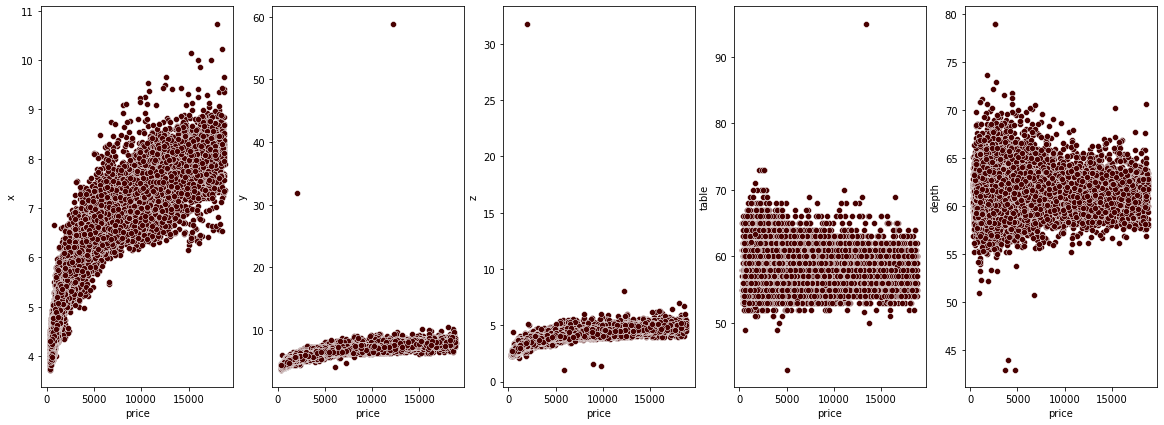

In [27]:
# plot x, y, z, table, depth in relation to price to check outliers
sns.set_palette("afmhot")
cols = ['x','y', 'z', 'table', 'depth']
c = 0

fig, axs = plt.subplots(ncols = len(cols), figsize=(20,7))

for i in cols:
    sns.scatterplot(data = raw_df, x = raw_df['price'], y = raw_df[i], ax = axs[c])
    c+=1

#### thresholds to remove outliers  
Keep all values of x because there are no extrem outliers  
keep only y values that are < 30  
keep only z values that are < 10  
keep only table values that are < 80 and > 25  
keep only depth values that are < 75 and > 45

In [28]:
# remove outliers from raw_df
raw_df = raw_df[(raw_df['y'] < 30)]
raw_df = raw_df[(raw_df['z'] < 10)]
raw_df = raw_df[(raw_df['table'] < 80) & (raw_df['table'] > 25)]
raw_df = raw_df[(raw_df['depth'] < 75) & (raw_df['depth'] > 45)]

raw_df.shape

(45823, 10)

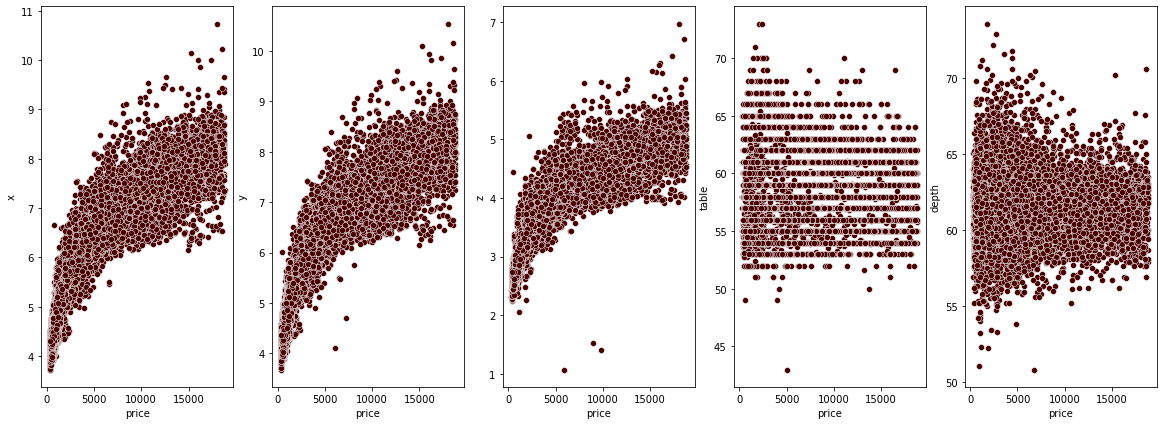

In [29]:
sns.set_palette("afmhot")
cols = ['x','y', 'z', 'table', 'depth']
c = 0

fig, axs = plt.subplots(ncols = len(cols), figsize=(20,7))

for i in cols:
    sns.scatterplot(data = raw_df, x = raw_df['price'], y = raw_df[i], ax = axs[c])
    c+=1

#### As 'cut', 'color', 'clarity' are categogy type, they are needed to transformed to numeric type. Because their values are ordinal in nature, they should be ordinally enconded.
- cut quality (Fair, Good, Very Good, Premium, Ideal)
- color from J (worst) to D (best)
- clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

In [30]:
# ordinal encode 'cut', 'color', 'clarity'
raw_df_nummeric = raw_df.copy()
raw_df_nummeric['cut'] = raw_df_nummeric['cut'].map({'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5})
raw_df_nummeric['color'] = raw_df_nummeric['color'].map({'J':1,'I':2,'H':3,'G':4,'F':5,'E':6,'D':7})
raw_df_nummeric['clarity'] = raw_df_nummeric['clarity'].map({'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8})

In [31]:
raw_df_nummeric

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.83,4,5,4,60.2,60.0,3495,6.09,6.04,3.65
1,1.25,4,3,3,60.7,58.0,5027,7.04,6.99,4.26
2,0.41,4,7,3,60.5,60.0,791,4.77,4.81,2.90
3,0.31,2,3,4,63.1,57.0,489,4.28,4.31,2.71
4,0.30,5,4,8,62.2,55.0,844,4.30,4.32,2.68
...,...,...,...,...,...,...,...,...,...,...
45844,0.44,4,4,3,61.1,59.0,990,4.90,4.86,2.98
45845,1.52,2,1,6,57.9,62.0,8861,7.61,7.63,4.41
45846,1.00,2,5,4,61.1,61.0,6841,6.38,6.45,3.92
45847,0.32,2,1,3,63.2,56.0,374,4.31,4.36,2.74


In [32]:
raw_df_nummeric.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.136118,-0.292834,-0.352663,0.031054,0.183634,0.921647,0.977737,0.976845,0.976422
cut,-0.136118,1.000000,0.020143,0.188678,-0.222880,-0.433516,-0.054863,-0.126881,-0.126382,-0.153421
color,-0.292834,0.020143,1.000000,-0.027585,-0.048671,-0.025929,-0.174750,-0.272491,-0.272359,-0.276697
clarity,-0.352663,0.188678,-0.027585,1.000000,-0.071743,-0.158300,-0.146438,-0.372886,-0.367868,-0.376956
depth,0.031054,-0.222880,-0.048671,-0.071743,1.000000,-0.300223,-0.008883,-0.022997,-0.026054,0.099296
table,0.183634,-0.433516,-0.025929,-0.158300,-0.300223,1.000000,0.129065,0.198032,0.191827,0.157736
price,0.921647,-0.054863,-0.174750,-0.146438,-0.008883,0.129065,1.000000,0.887156,0.888724,0.882016
x,0.977737,-0.126881,-0.272491,-0.372886,-0.022997,0.198032,0.887156,1.000000,0.998673,0.990938
y,0.976845,-0.126382,-0.272359,-0.367868,-0.026054,0.191827,0.888724,0.998673,1.000000,0.990645
z,0.976422,-0.153421,-0.276697,-0.376956,0.099296,0.157736,0.882016,0.990938,0.990645,1.000000


<AxesSubplot:>

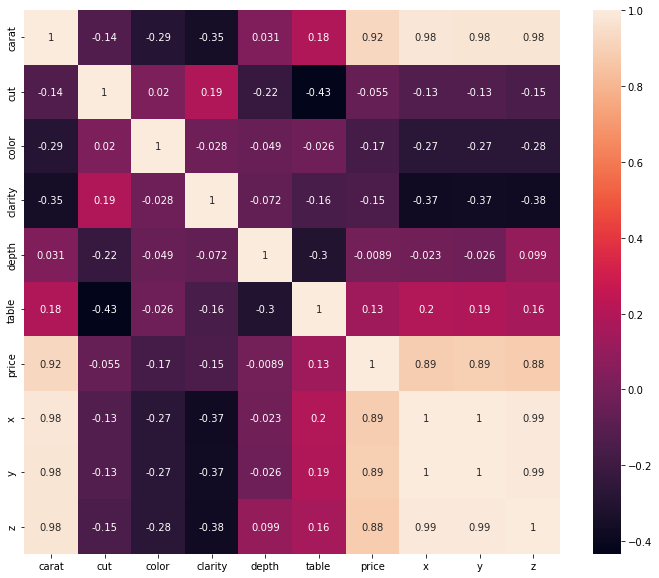

In [33]:
figure, ax = plt.subplots(figsize=(12,10))

sns.heatmap(raw_df_nummeric.corr(), annot = True)

#### there is a high correlation between x, y, z, carat to the price

## Predicting the price (Regression task)

## Linear Regression

In [34]:
df_reg = raw_df_nummeric.copy()

In [35]:
import operator

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split

In [36]:
independent_reg = df_reg.drop("price", axis=1)
dependent_reg = df_reg['price']

In [37]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(independent_reg, dependent_reg, test_size=0.2, 
                                                                    random_state=42)

In [35]:
LR_model = LinearRegression()
LR_model.fit(X_train_reg, y_train_reg)
y_pred_reg = LR_model.predict(X_test_reg)

In [36]:
# Error measurement
mse = mean_squared_error(y_test_reg, y_pred_reg)
print("MSE : "+ str(mse))
rmse= np.sqrt(mse)
print("RMSE: "+ str(rmse))
mae = mean_absolute_error(y_test_reg, y_pred_reg)
print("MAE : "+ str(mae))
r2 = r2_score(y_test_reg, y_pred_reg)
print("R2  : "+ str(r2))

MSE : 1413682.6331601574
RMSE: 1188.9838658115414
MAE : 794.3486415535999
R2  : 0.9123394528568807


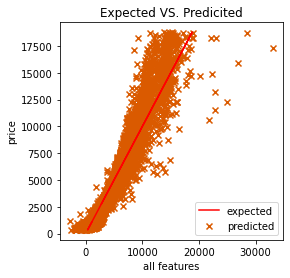

In [37]:
plt.figure(figsize = (4,4))

plt.plot(y_test_reg, y_test_reg, color="r", label ="expected")
plt.scatter(y_pred_reg, y_test_reg, marker='x', color="C2", label ="predicted")
plt.legend()
plt.xlabel("all features")
plt.ylabel("price")
plt.title("Expected VS. Predicited")

plt.show()

### Predict the price based only on "carat", "x", "y", "z" (Linear Regression)

In [38]:
independent_reg2 = df_reg[['carat', 'x', 'y', 'z']]
dependent_reg2 = df_reg['price']

In [39]:
independent_reg2

,carat,x,y,z
0,0.83,6.09,6.04,3.65
1,1.25,7.04,6.99,4.26
2,0.41,4.77,4.81,2.90
3,0.31,4.28,4.31,2.71
4,0.30,4.30,4.32,2.68
...,...,...,...,...
45844,0.44,4.90,4.86,2.98
45845,1.52,7.61,7.63,4.41
45846,1.00,6.38,6.45,3.92
45847,0.32,4.31,4.36,2.74


In [40]:
X_train_reg2, X_test_reg2, y_train_reg2, y_test_reg2 = train_test_split(independent_reg2, dependent_reg2, test_size=0.2, 
                                                                    random_state=42)

In [41]:
LR_model2 = LinearRegression()
LR_model2.fit(X_train_reg2, y_train_reg2)
y_pred_reg2 = LR_model2.predict(X_test_reg2)

In [42]:
# Error measurement
mse = mean_squared_error(y_test_reg2, y_pred_reg2)
print("MSE : "+ str(mse))
rmse= np.sqrt(mse)
print("RMSE: "+ str(rmse))
mae = mean_absolute_error(y_test_reg2, y_pred_reg2)
print("MAE : "+ str(mae))
r2 = r2_score(y_test_reg2, y_pred_reg2)
print("R2  : "+ str(r2))

MSE : 2162962.760698674
RMSE: 1470.701451926486
MAE : 892.7041831933145
R2  : 0.8658776060443002


### The prediction of price based only on carat, x, y, z gives lower R2 and higher errors

## K Nearest Neighbor Regression

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [44]:
#Train Model and Predict
k = 6  
KNN_reg = KNeighborsRegressor(n_neighbors = k).fit(X_train_reg,y_train_reg)
y_pred_KNNR = KNN_reg.predict(X_test_reg)

In [45]:
# Error measurement
mse = mean_squared_error(y_test_reg, y_pred_KNNR)
print("MSE : "+ str(mse))
rmse= np.sqrt(mse)
print("RMSE: "+ str(rmse))
mae = mean_absolute_error(y_test_reg, y_pred_KNNR)
print("MAE : "+ str(mae))
r2 = r2_score(y_test_reg, y_pred_KNNR)
print("R2  : "+ str(r2))

MSE : 712374.1450506153
RMSE: 844.0225974762852
MAE : 468.4478996181124
R2  : 0.9558266432217859


### Testing with k = 4, 5, 6, 7 in which k = 6 gives the highest R2, less errors

## Random Forest Regressor

In [43]:
import warnings
warnings.filterwarnings('ignore')

# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfr = RandomForestRegressor(max_depth = 15, random_state = 42) # R2 increased when max_depth increase
rfr.fit(X_train_reg, y_train_reg)
y_pred_RFR = rfr.predict(X_test_reg)

print("MAE: ",mean_absolute_error(y_test_reg, y_pred_RFR))

print("R2: ", r2_score(y_test_reg, y_pred_RFR))

print("MSE: ", mean_squared_error(y_test_reg, y_pred_RFR))

MAE:  274.6236435939095
R2:  0.9820158007251741
MSE:  290027.281538687


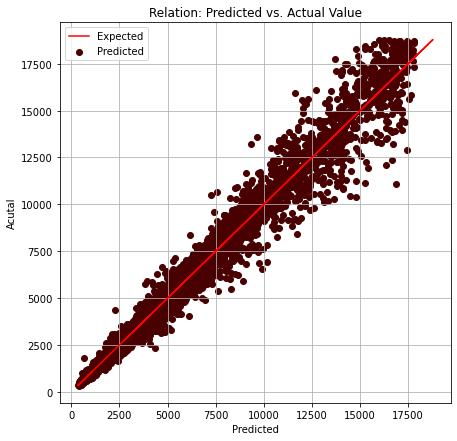

In [48]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(y_test_reg, y_test_reg, label="Expected", color = "red")
ax.scatter(y_pred_RFR, y_test_reg, label = "Predicted")

ax.set(xlabel='Predicted', ylabel='Acutal',
       title='Relation: Predicted vs. Actual Value')

ax.grid()
ax.legend()

plt.show()

### dataset with ordinal encoding for carat, x, y, z give better results than dataset with onehot encoding

## Neural Network Regression

In [38]:
from sklearn.neural_network import MLPRegressor

In [50]:
NN_reg = MLPRegressor(random_state=1, max_iter=300).fit(X_train_reg, y_train_reg)
y_pred_NNR = NN_reg.predict(X_test_reg)

In [51]:
# Error measurement
mse = mean_squared_error(y_test_reg, y_pred_NNR)
print("MSE : "+ str(mse))
rmse= np.sqrt(mse)
print("RMSE: "+ str(rmse))
mae = mean_absolute_error(y_test_reg, y_pred_NNR)
print("MAE : "+ str(mae))
r2_ = r2_score(y_test_reg, y_pred_NNR)
print("R2  : "+ str(r2))

MSE : 612276.3165368778
RMSE: 782.4808729527373
MAE : 466.2592979205832
R2  : 0.9558266432217859


## Finding hyperparameters using Grid Search

### As Randon Forest Regression and Neural Network Regression give highest R2 and lowest errors, we will do Grid Search the find best hyperparameters of these 2 models and compare their performance to choose the best model for our problem

In [39]:
# Grid search
from sklearn.model_selection import GridSearchCV

### Grid search for Randon Forest Regression

In [74]:
#Create the parameter grid based on the results of random search 
rfr_param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5,50,100],
    'max_features': [5,10,20,40,None],
    'min_samples_leaf': [1,10,50,100],
    'min_samples_split': [5,10],
    'n_estimators': [0,50,100], 
    'random_state' : [0,20,40,60]
}
# Create a based model
rfr_GridSearch = RandomForestRegressor()

# Instantiate the grid search model
rfr_grid_search = GridSearchCV(estimator = rfr_GridSearch, param_grid = rfr_param_grid, 
                               cv = 3, n_jobs = -1, verbose = 2, scoring=['r2', 'neg_mean_absolute_error'],
                               refit='neg_mean_absolute_error')

# Test the Model on different grid parameter
rfr_grid_search.fit(X_train_reg, y_train_reg)
print(rfr_grid_search.best_params_)

Fitting 3 folds for each of 2880 candidates, totalling 8640 fits
{'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 0}


### Predict the price with the created model

In [75]:
rfr_best = rfr_grid_search.best_estimator_
y_pred_best_RFR = rfr_best.predict(X_test_reg)

print("MAE: ",mean_absolute_error(y_test_reg, y_pred_best_RFR))
print("R2: ", r2_score(y_test_reg, y_pred_best_RFR))
print("MSE: ", mean_squared_error(y_test_reg, y_pred_best_RFR))

MAE:  271.5357593976233
R2:  0.9823703694269696
MSE:  284309.22897882696


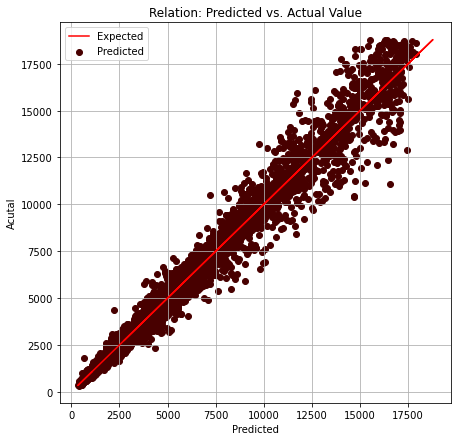

In [76]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(y_test_reg, y_test_reg, label="Expected", color = "red")
ax.scatter(y_pred_best_RFR, y_test_reg, label = "Predicted")

ax.set(xlabel='Predicted', ylabel='Acutal',
       title='Relation: Predicted vs. Actual Value')

ax.grid()
ax.legend()

plt.show()

### Grid search for Neural Network Regression

In [40]:
#Create the parameter grid based on the results of random search 
NNR_param_grid = {
    'hidden_layer_sizes': [100, 200, 400],
    #'learning_rate': ['constant','invscaling', 'adaptive'],
    'max_iter': [100,200,400,500],
    #'early_stopping': [True, False],
    #'activation': ['identity', 'logistic','tanh', 'relu'], 
    'random_state' : [0,20,40,60]
}
# Create a based model
NNR_GridSearch = MLPRegressor()

# Instantiate the grid search model
NNR_grid_search = GridSearchCV(estimator = NNR_GridSearch, param_grid = NNR_param_grid, 
                               
                               cv = 3, n_jobs = -1, verbose = 2, scoring=['r2', 'neg_mean_absolute_error'],
                               refit='neg_mean_absolute_error')

# Test the Model on different grid parameter
NNR_grid_search.fit(X_train_reg, y_train_reg)
print(NNR_grid_search.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
{'hidden_layer_sizes': 400, 'max_iter': 500, 'random_state': 60}


C:\Users\pc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### Predict the price with the created model

In [41]:
NNR_best = NNR_grid_search.best_estimator_
y_pred_best_NNR = NNR_best.predict(X_test_reg)

print("MAE: ",mean_absolute_error(y_test_reg, y_pred_best_NNR))
print("R2: ", r2_score(y_test_reg, y_pred_best_NNR))
print("MSE: ", mean_squared_error(y_test_reg, y_pred_best_NNR))

MAE:  381.39279185716157
R2:  0.9723629552434271
MSE:  445696.62724611274


# classification task: predict the cut

## K Nearest Neighbor Classifier

In [45]:
df_clf = raw_df_nummeric.copy()

In [46]:
X_clf = df_clf.drop(['cut'], axis = 1)
y_clf = df_clf['cut']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.20, random_state = 42)

In [54]:
k = 7  
KNN_clf = KNeighborsClassifier(n_neighbors = k).fit(X_train_clf,y_train_clf)
y_pred_KNNC = KNN_clf.predict(X_test_clf)

In [55]:
print("Accuracy of model at K=7 is", metrics.accuracy_score(y_test_clf, y_pred_KNNC))
print (f"Score on known data: {KNN_clf.score(X_train_clf, y_train_clf)}")
print (f"Score on unknown data: {KNN_clf.score(X_test_clf, y_test_clf)}")

Accuracy of model at K=7 is 0.5229678123295145
Score on known data: 0.647252987069671
Score on unknown data: 0.5229678123295145


### k =  7 gives highest accuracy for KNN classifier model

In [56]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_clf, y_pred_KNNC))

[[  29   61   72   61   56]
 [  10  148  262  245  191]
 [   8  119  626  570  691]
 [   4   63  421 1210  563]
 [   2   68  440  465 2780]]


## Naive Bayes Classifier

In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
GNB = GaussianNB()
GNB_clf = GNB.fit(X_train_clf, y_train_clf)
y_pred_GNB = GNB_clf.predict(X_test_clf)

In [59]:
print (f"Score on known data: {GNB_clf.score(X_train_clf, y_train_clf)}")
print (f"Score on unknown data: {GNB_clf.score(X_test_clf, y_test_clf)}")

Score on known data: 0.5722625347809482
Score on unknown data: 0.5711947626841244


In [60]:
print(confusion_matrix(y_test_clf, y_pred_GNB))

[[ 121  131   16    9    2]
 [  77  173  335  144  127]
 [  32   70  501  680  731]
 [   8   36  371 1318  528]
 [  23    3  106  501 3122]]


## Randon Forest Classification

In [61]:
RF_clf = RandomForestClassifier(max_depth = 20, random_state = 42)
RF_clf.fit(X_train_clf, y_train_clf)
y_pred_RFC = RF_clf.predict(X_test_clf)

In [62]:
print (f"Score on known data: {RF_clf.score(X_train_clf, y_train_clf)}")
print (f"Score on unknown data: {RF_clf.score(X_test_clf, y_test_clf)}")

Score on known data: 0.9426591739865786
Score on unknown data: 0.7814511729405347


In [63]:
# Error measurement
mse = mean_squared_error(y_test_clf, y_pred_RFC)
print("MSE : "+ str(mse))
rmse= np.sqrt(mse)
print("RMSE: "+ str(rmse))
mae = mean_absolute_error(y_test_clf, y_pred_RFC)
print("MAE : "+ str(mae))
r2 = r2_score(y_test_clf, y_pred_RFC)
print("R2  : "+ str(r2))

MSE : 0.44386252045826513
RMSE: 0.6662300807215666
MAE : 0.29088925259138027
R2  : 0.6502981176182976


In [64]:
print(confusion_matrix(y_test_clf, y_pred_RFC))

[[ 246   23    3    6    1]
 [  18  578  190   55   15]
 [   2   95 1025  504  388]
 [   0    6  118 1871  266]
 [   3    5  145  160 3442]]


## Grid search for Randon Forest Classification

In [ ]:
#Create the parameter grid based on the results of random search 
RFC_param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5,50,100],
    'max_features': [5,10,20,40,None],
    'min_samples_leaf': [1,10,50,100],
    'min_samples_split': [5,10],
    'n_estimators': [0,50,100], 
    'random_state' : [0,20,40,60]
}
# Create a based model
RFC_GridSearch = RandomForestClassifier()

# Instantiate the grid search model
RFC_grid_search = GridSearchCV(estimator = RFC_GridSearch, param_grid = RFC_param_grid, 
                               cv = 3, n_jobs = -1, verbose = 2, scoring=['r2', 'neg_mean_absolute_error'],
                               refit='neg_mean_absolute_error')

# Test the Model on different grid parameter
RFC_grid_search.fit(X_train_clf, y_train_clf)
print(RFC_grid_search.best_params_)

Fitting 3 folds for each of 2880 candidates, totalling 8640 fits


## Support Vector Classification

In [65]:
import sklearn
from sklearn import svm # Support Vector Machine

In [66]:
print(sklearn.__version__)

1.1.1


In [67]:
svc_model_linear = svm.LinearSVC(C=1.0) #SVC = Support Vector Classifier
svc_model_linear.fit(X_train_clf, y_train_clf)
y_pred_SVC = svc_model_linear.predict(X_test_clf)

In [68]:
print (f"Score on known data: {svc_model_linear.score(X_train_clf, y_train_clf)}")
print (f"Score on unknown data: {svc_model_linear.score(X_test_clf, y_test_clf)}")

Score on known data: 0.42735555676796333
Score on unknown data: 0.4338243316966721


In [69]:
# Error measurement
mse = mean_squared_error(y_test_clf, y_pred_SVC)
print("MSE : "+ str(mse))
rmse= np.sqrt(mse)
print("RMSE: "+ str(rmse))
mae = mean_absolute_error(y_test_clf, y_pred_SVC)
print("MAE : "+ str(mae))
r2 = r2_score(y_test_clf, y_pred_SVC)
print("R2  : "+ str(r2))

MSE : 2.010911074740862
RMSE: 1.418065962760852
MAE : 0.9627932351336607
R2  : -0.5843180167882926


In [70]:
print(confusion_matrix(y_test_clf, y_pred_SVC))

[[   0   31   51   32  165]
 [   0   53  324   55  424]
 [   0  109  737  119 1049]
 [   0  118 1127  186  830]
 [   0  217  521   17 3000]]
